In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [25]:
def prework(df_name):
    df = pd.read_csv(df_name, index_col='Date', parse_dates=['Date'])
    b = list(np.diff(np.log(df.Close)))
    b.insert(0, 0)
    df["Returns"] = b
    df["Returns_pct"] = df["Returns"] * 100
    df.drop(['Open', 'High', "Low", "Vol.", "Change %"], axis=1, inplace=True)
    return df

In [26]:
BET_index = prework("BET.csv")
SMI = prework("SMI.csv")
BEL = prework("BEL_20.csv")
DJI = prework("DJI.csv")

In [27]:
BET_index.describe()

,Close,Returns,Returns_pct
count,2003.000000,2003.000000,2003.000000
mean,7085.771842,0.000355,0.035479
std,1309.496015,0.008822,0.882172
min,4304.000000,-0.118927,-11.892694
25%,6296.500000,-0.003973,-0.397281
50%,7036.000000,0.000466,0.046642
75%,8109.000000,0.004746,0.474629
max,10220.000000,0.068150,6.814985


In [28]:
SMI.describe()

,Close,Returns,Returns_pct
count,2003.000000,2003.000000,2003.000000
mean,8460.223165,0.000280,0.027965
std,1007.508990,0.008788,0.878844
min,5713.000000,-0.090635,-9.063532
25%,7983.500000,-0.004112,-0.411214
50%,8622.000000,0.000475,0.047517
75%,9048.500000,0.004936,0.493597
max,10895.000000,0.033669,3.366931


In [29]:
BEL = prework("BEL_20.csv")
BEL.describe()

,Close,Returns,Returns_pct
count,2044.000000,2044.000000,2044.000000
mean,3325.539139,0.000267,0.026685
std,538.184446,0.009360,0.936015
min,2049.000000,-0.066179,-6.617890
25%,2942.500000,-0.004750,-0.474961
50%,3487.500000,0.000513,0.051282
75%,3745.000000,0.005642,0.564175
max,4177.000000,0.037854,3.785372


In [30]:
DJI.describe()

,Close,Returns,Returns_pct
count,2013.000000,2013.000000,2013.000000
mean,19350.337308,0.000397,0.039664
std,4589.529708,0.007987,0.798748
min,12101.000000,-0.047134,-4.713408
25%,16070.000000,-0.003044,-0.304356
50%,17899.000000,0.000564,0.056446
75%,24189.000000,0.004597,0.459743
max,29348.000000,0.048633,4.863282


In [31]:
indexes = [BET_index, SMI, BEL, DJI]
skew = []
kurtosis = []
for i in indexes:
    skew.append(i["Returns"].skew())
    kurtosis.append(i["Returns"].kurtosis())

In [32]:
map(lambda x: "{:.2f}".format(x), skew)
skew

[-1.6379303560752485,
 -0.8920074300661618,
 -0.38587297862901865,
 -0.45972037173762503]

In [33]:
kurtosis

[22.571177702471402, 8.035253548864079, 2.828239222855943, 3.4932449454022767]

In [34]:
from datetime import datetime
a = datetime.now().strftime('_%d_%m_%Y.png')

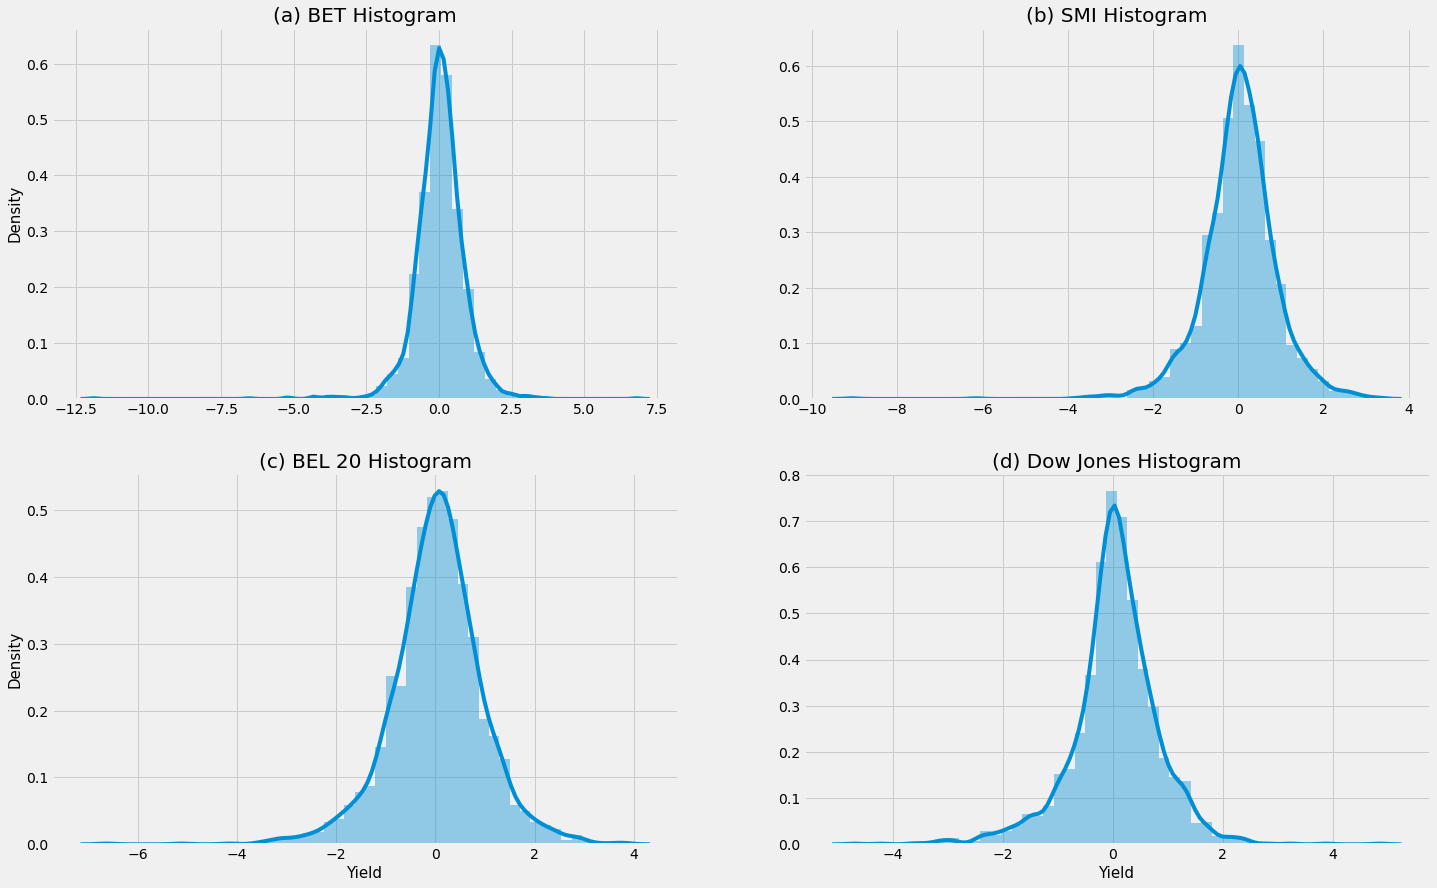

In [37]:
titles = ["(a) BET Histogram", "(b) SMI Histogram", "(c) BEL 20 Histogram", "(d) Dow Jones Histogram"]
fig = plt.figure(figsize=(22, 14)) 
for i in range(0,4):
    ax = fig.add_subplot(2,2,i+1) 
    sns.distplot(indexes[i]["Returns_pct"])
    plt.ylabel("Density", fontsize = 15) 
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom = "off")
    plt.title(titles[i], fontsize=20)
    plt.xlabel("")
    if (i == 2 or i == 3):
        plt.xlabel("Yield", fontsize = 15)
    
    
    if (i == 1 or i == 3) :
        plt.ylabel("")

savename = "Histogram"  
plt.savefig(savename + a)

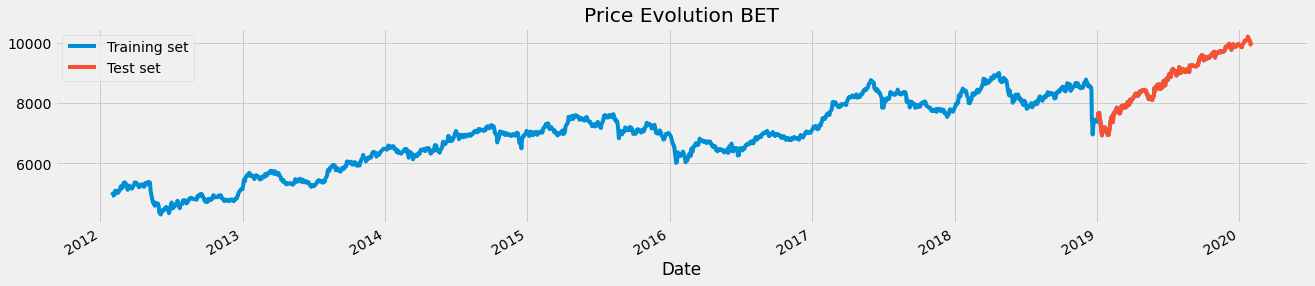

In [38]:
BET_index["Close"][:'2019'].plot(figsize=(20,4), legend=True)
BET_index["Close"]['2019':].plot(figsize=(20,4), legend=True) 
plt.legend(['Training set','Test set'])
plt.title('Price Evolution BET')
savename_evol_pret = "Price_Evolution_BET"  
plt.savefig(savename_evol_pret + a)

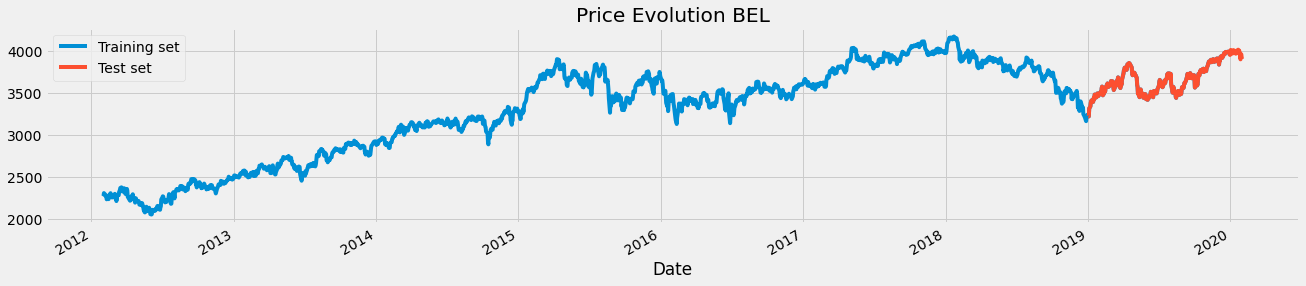

In [39]:
BEL["Close"][:'2019'].plot(figsize=(20,4), legend=True)
BEL["Close"]['2019':].plot(figsize=(20,4), legend=True) 
plt.legend(['Training set','Test set'])
plt.title('Price Evolution BEL')
savename_evol_pret = "Price_Evolution_BEL"  
plt.savefig(savename_evol_pret + a)

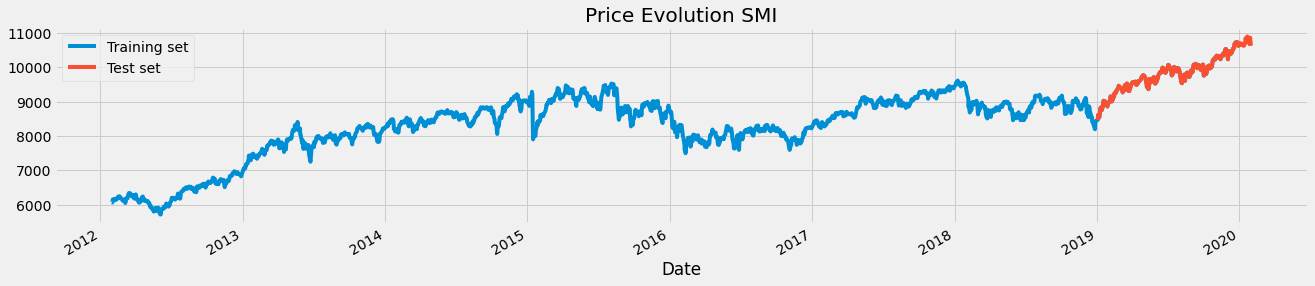

In [40]:
fig = plt.figure(figsize=(10, 18)) 
SMI["Close"][:'2019'].plot(figsize=(20,4), legend=True)
SMI["Close"]['2019':].plot(figsize=(20,4), legend=True) 
plt.legend(['Training set','Test set'])
plt.title('Price Evolution SMI')
savename_evol_pret = "Price_Evolution_SMI"  
plt.savefig(savename_evol_pret + a)


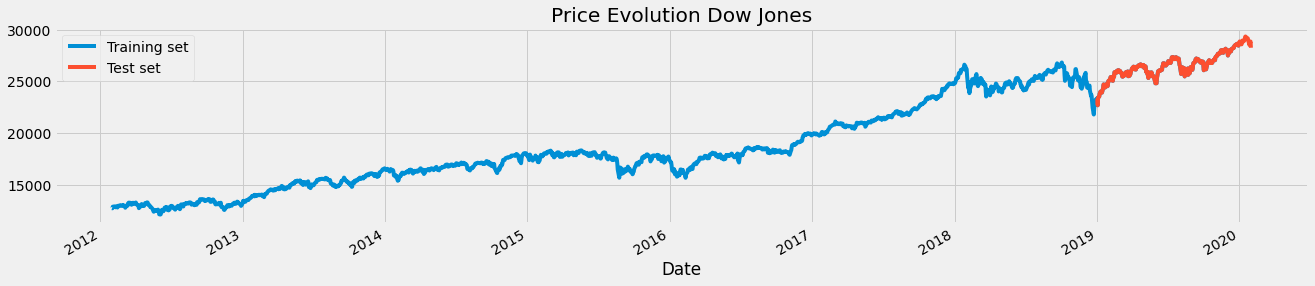

In [41]:

DJI["Close"][:'2019'].plot(figsize=(20,4), legend=True)
DJI["Close"]['2019':].plot(figsize=(20,4), legend=True) 
plt.legend(['Training set','Test set'])
plt.title('Price Evolution Dow Jones')
savename_evol_pret = "Price_Evolution_DJI"  
plt.savefig(savename_evol_pret + a)
plt.show()

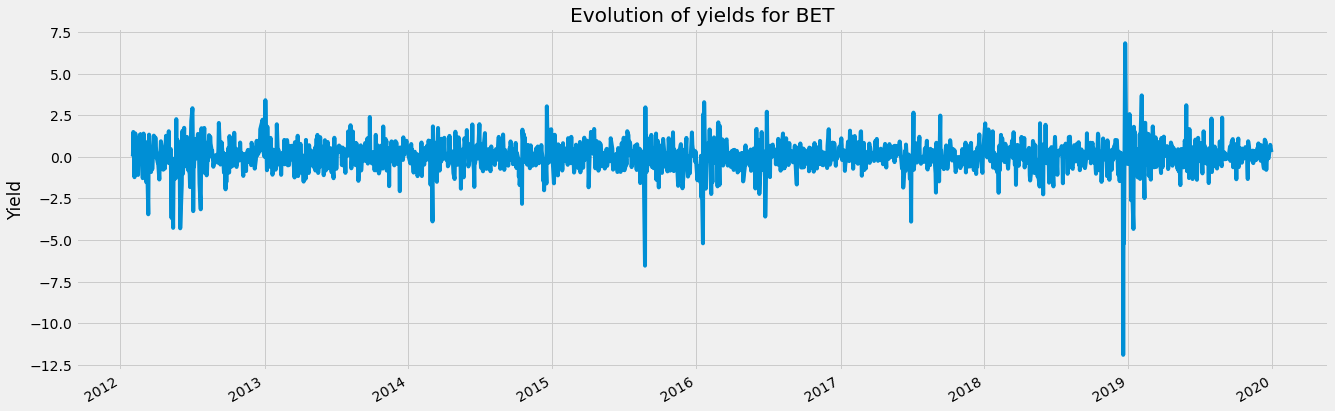

In [43]:
fig, ax = plt.subplots(figsize=(20, 7))
BET_index["Returns_pct"][:'2019'].plot()
plt.title("Evolution of yields for BET")
plt.ylabel("Yield")
plt.xlabel("")
#style = dict(size=12, color='gray')
#ax.text("2013-02-06",-3, "New Year's Day", **style)
savename_evol_rand = "Evolution_yields_BET"  
plt.savefig(savename_evol_rand + a)
plt.show()

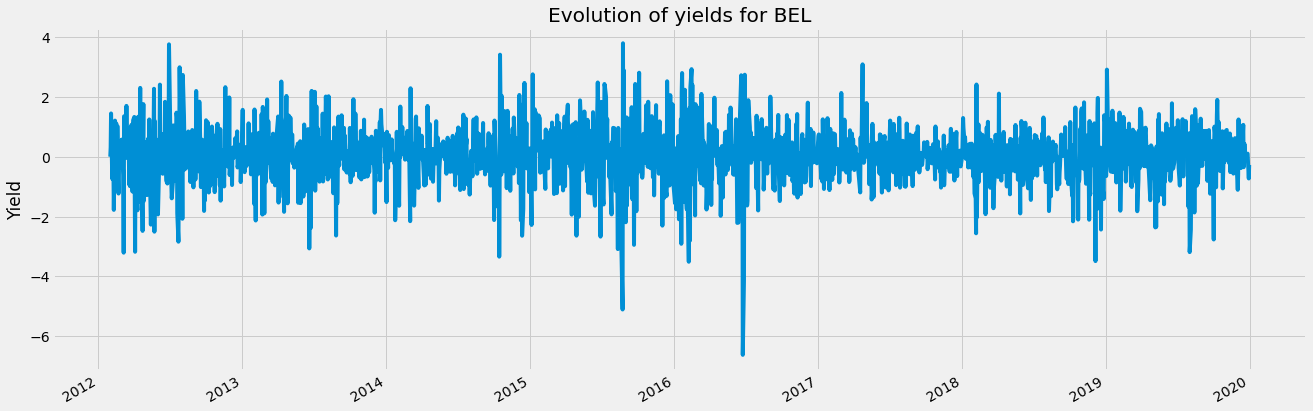

In [44]:
fig, ax = plt.subplots(figsize=(20, 7))
BEL["Returns_pct"][:'2019'].plot()
plt.title("Evolution of yields for BEL")
plt.ylabel("Yield")
plt.xlabel("")
#style = dict(size=12, color='gray')
#ax.text("2013-02-06",-3, "New Year's Day", **style)
savename_evol_rand = "Evolution_yields_BEL"  
plt.savefig(savename_evol_rand + a)
plt.show()

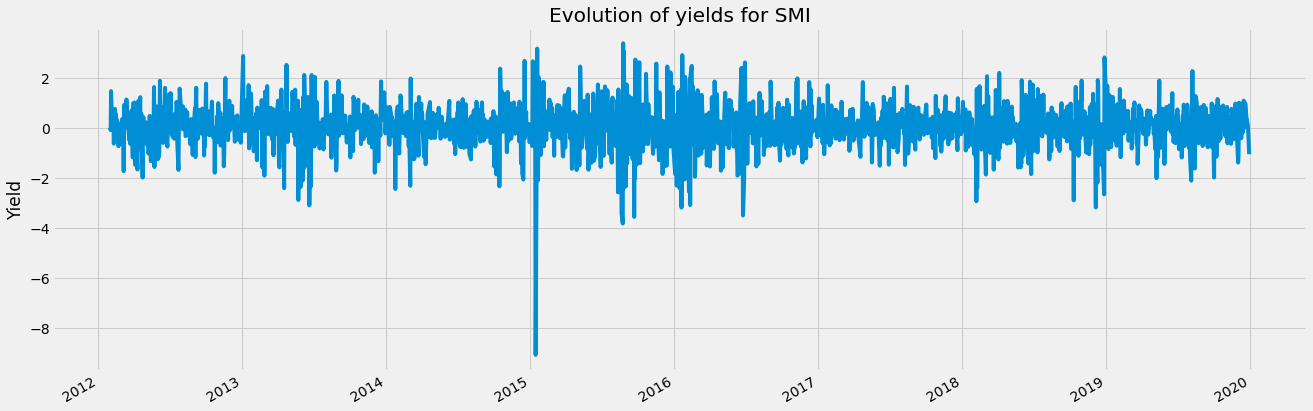

In [45]:
fig, ax = plt.subplots(figsize=(20, 7))
SMI["Returns_pct"][:'2019'].plot()
plt.title("Evolution of yields for SMI")
plt.ylabel("Yield")
plt.xlabel("")
#style = dict(size=12, color='gray')
#ax.text("2013-02-06",-3, "New Year's Day", **style)
savename_evol_rand = "Evolution_yields_SMI"  
plt.savefig(savename_evol_rand + a)
plt.show()

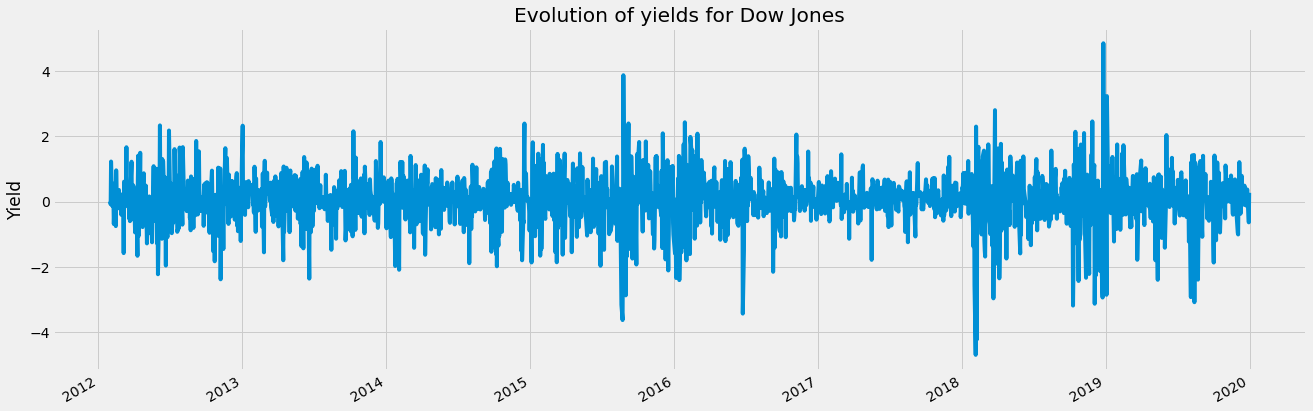

In [46]:
fig, ax = plt.subplots(figsize=(20, 7))
DJI["Returns_pct"][:'2019'].plot()
plt.title("Evolution of yields for Dow Jones")
plt.ylabel("Yield")
plt.xlabel("")
#style = dict(size=12, color='gray')
#ax.text("2013-02-06",-3, "New Year's Day", **style)
savename_evol_rand = "Evolution_yields_Dow"  
plt.savefig(savename_evol_rand + a)
plt.show()